# Classification Between Group3+4 and Rest

## Required Imports

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
# from xgboost import XGBClassifier

## Data Preprocessing/Loading 

In [6]:
# load data
file_path = "features.csv"
df = pd.read_csv(file_path)
df.head()

,case,molecular,split,t1_diagnostics_Versions_PyRadiomics,t1_diagnostics_Versions_Numpy,t1_diagnostics_Versions_SimpleITK,t1_diagnostics_Versions_PyWavelet,t1_diagnostics_Versions_Python,t1_diagnostics_Configuration_Settings,t1_diagnostics_Configuration_EnabledImageTypes,...,t2_wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,t2_wavelet-LLL_glszm_LowGrayLevelZoneEmphasis,t2_wavelet-LLL_glszm_SizeZoneNonUniformity,t2_wavelet-LLL_glszm_SizeZoneNonUniformityNormalized,t2_wavelet-LLL_glszm_SmallAreaEmphasis,t2_wavelet-LLL_glszm_SmallAreaHighGrayLevelEmphasis,t2_wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis,t2_wavelet-LLL_glszm_ZoneEntropy,t2_wavelet-LLL_glszm_ZonePercentage,t2_wavelet-LLL_glszm_ZoneVariance
0,523990jiangjunliang,group4,test,v3.0.1,1.23.3,2.0.2,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [5, 3, 1]}, ...",...,3.506806,0.002626,2235.096997,0.358936,0.621201,809.617832,0.001516,7.939077,0.160568,2406.080238
1,547288zhaoruiyi,shh,test,v3.0.1,1.23.3,2.0.2,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [5, 3, 1]}, ...",...,1.442664,0.000942,4126.648368,0.385921,0.644963,1929.001990,0.000511,8.302176,0.227894,1829.036486
2,573499wangyichen,group4,test,v3.0.1,1.23.3,2.0.2,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [5, 3, 1]}, ...",...,0.463660,0.000882,4191.204111,0.377858,0.637554,1595.730416,0.000489,8.095653,0.265086,585.861721
3,420087chenxuanyu,group4,test,v3.0.1,1.23.3,2.0.2,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [5, 3, 1]}, ...",...,0.028913,0.000744,6401.534329,0.367799,0.629025,1666.661643,0.000471,8.074876,0.355974,41.097232
4,467268louxu,group4,test,v3.0.1,1.23.3,2.0.2,1.3.0,3.9.13,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'LoG': {'sigma': [5, 3, 1]}, ...",...,0.111758,0.000953,3675.878284,0.368546,0.630061,1530.438709,0.000627,8.237877,0.285183,183.487174


In [10]:
# obtain list of features selected from LASSO
# reduced_feats_path = "/Users/samwwong/Desktop/Michael Zhang/reduced_molec.xlsx"
# reduced_features = pd.read_excel(reduced_feats_path)
# reduced_features_list = reduced_features.loc[reduced_features['group3_rest'].isnull() == False,
#                                              ['group3_rest']].values.tolist()
# reduced_features_list = [item for sublist in reduced_features_list for item in sublist]
# features_after_lasso = df[reduced_features_list]
# sex_binarized = features_after_lasso['sex'].map(dict(M = 1, F = 0)).to_numpy()
# features_after_lasso['sex'] = sex_binarized
# print(reduced_features_list)
reduced_features_list = ['t1_log-sigma-1-mm-3D_glszm_SmallAreaLowGrayLevelEmphasis', 't1_log-sigma-3-mm-3D_firstorder_Median', 't1_log-sigma-3-mm-3D_glcm_ClusterProminence', 't1_log-sigma-3-mm-3D_glrlm_LowGrayLevelRunEmphasis', 't1_log-sigma-5-mm-3D_glszm_GrayLevelVariance', 't1_original_glszm_LargeAreaHighGrayLevelEmphasis', 't1_original_glszm_LargeAreaLowGrayLevelEmphasis', 't1_original_shape_Flatness', 't1_wavelet-HHL_firstorder_Skewness', 't1_wavelet-HLL_firstorder_Mean', 't1_wavelet-HLL_glcm_Correlation', 't1_wavelet-LHL_glcm_Correlation', 't1_wavelet-LLH_glszm_LargeAreaLowGrayLevelEmphasis', 't1_wavelet-LLL_firstorder_Skewness', 't1_wavelet-LLL_glszm_ZoneVariance', 't2_log-sigma-1-mm-3D_firstorder_Mean', 't2_log-sigma-1-mm-3D_firstorder_Median', 't2_log-sigma-1-mm-3D_glcm_Correlation', 't2_log-sigma-5-mm-3D_firstorder_Kurtosis', 't2_log-sigma-5-mm-3D_glrlm_RunLengthNonUniformity', 't2_log-sigma-5-mm-3D_glszm_SmallAreaEmphasis', 't2_original_glszm_GrayLevelNonUniformity', 't2_wavelet-HHH_glrlm_RunPercentage', 't2_wavelet-HHH_glszm_LargeAreaEmphasis', 't2_wavelet-HHH_glszm_SmallAreaLowGrayLevelEmphasis', 't2_wavelet-HHL_glcm_ClusterProminence', 't2_wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis', 't2_wavelet-HHL_glszm_LargeAreaHighGrayLevelEmphasis', 't2_wavelet-HLH_glszm_SizeZoneNonUniformityNormalized', 't2_wavelet-HLL_firstorder_Mean', 't2_wavelet-LHH_firstorder_Mean', 't2_wavelet-LHH_glszm_GrayLevelNonUniformityNormalized', 't2_wavelet-LHL_glcm_Idn', 't2_wavelet-LLL_firstorder_Energy', 't2_wavelet-LLL_glcm_JointAverage', 't1_log-sigma-3-mm-3D_glrlm_ShortRunLowGrayLevelEmphasis', 't1_wavelet-HHH_firstorder_Skewness', 't1_wavelet-HHH_glszm_LargeAreaHighGrayLevelEmphasis', 't1_wavelet-HHL_glcm_ClusterProminence', 't1_wavelet-LHH_firstorder_Median', 't2_log-sigma-5-mm-3D_glcm_Imc2', 't2_original_glcm_Idmn', 't2_wavelet-LLL_firstorder_Median', 't2_wavelet-HHH_firstorder_Skewness', 't2_original_firstorder_Kurtosis', 't2_wavelet-LLL_firstorder_TotalEnergy']
print(len(reduced_features_list))
features_after_lasso = df[reduced_features_list]

46


In [11]:
# Binarizing target
target = df["molecular"]

# Marking 0 as rest and 1 group3+4
# mapping_dict = {0: 'rest', 1: 'group3'}
# target = target.map(dict(rest = 0, group3 = 1))
target = target.map({
    'wnt': 0,
    'shh': 0,
    'group3': 1,
    'group4': 1,
})
print(target.value_counts())

1    126
0     46
Name: molecular, dtype: int64


In [12]:
# Train/test split
train_idx = df['split'] != 'test'
test_idx = ~train_idx

X_train = features_after_lasso[train_idx]
X_test = features_after_lasso[test_idx]
y_train = target[train_idx]
y_test = target[test_idx]

# X_train, X_test, y_train, y_test = train_test_split(features_after_lasso, target,
#                                                     test_size = 0.25, random_state = 42)
print("TRAIN")
print(y_train.value_counts())

print("TEST")
print(y_test.value_counts())

TRAIN
1    92
0    33
Name: molecular, dtype: int64
TEST
1    34
0    13
Name: molecular, dtype: int64


### Resampling to Correct for Imbalance

In [13]:
X = pd.concat([X_train, y_train], axis = 1)
X_0 = X[X['molecular'] == 0]
X_1 = X[X['molecular'] == 1]

In [14]:
upsampled_0 = resample(X_0, replace = True, n_samples = len(X_1), random_state = 42)
upsampled = pd.concat([upsampled_0, X_1])
upsampled = upsampled.sample(frac = 1, random_state = 42)

In [15]:
X_train = upsampled.iloc[:, :-1]
y_train = upsampled.iloc[:, -1]
print(y_train.value_counts())

0    92
1    92
Name: molecular, dtype: int64


### Standardizing Features

In [16]:
names = X_train.columns
scaler = preprocessing.StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = names)

In [18]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = names)

## Modeling

### User Defined Functions for Metrics

In [70]:
def create_ci(bootstrapped_scores, name):
    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    
    confidence_lower = sorted_scores[int(0.025 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.975 * len(sorted_scores))]
    
    print("95% Confidence interval for the {} score: [{:0.4f} - {:0.4}]".format(name, 
    confidence_lower, confidence_upper))

In [71]:
def specificity_score(y_true, y_pred):
    TN = 0
    FP = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 0:
            TN += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
    return TN / (TN + FP) 
    #return round((TN / (TN + FP)),4) 

In [72]:
def positive_pv_score(y_true, y_pred):
    TP = 0
    FP = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 1:
            TP += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            FP += 1
    
    return round((TP/(TP+FP)),4)

In [73]:
def negative_pv_score(y_true, y_pred):
    TN = 0
    FN = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 0:
            TN += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            FN += 1
    
    return round((TN/(TN+FN)),4)        

In [74]:
def print_metrics(y_test, y_pred):
    print("Sens Score: " + str.format('{0:.4f}', (recall_score(y_test, y_pred))))
    print("Spec Score: " + str.format('{0:.4f}', (specificity_score(y_test.to_numpy(), y_pred))))
    print("PPV Score: " + str.format('{0:.4f}', (positive_pv_score(y_test.to_numpy(), y_pred))))
    print("NPV Score: " + str.format('{0:.4f}', (negative_pv_score(y_test.to_numpy(), y_pred))))
    print("Acc Score: " + str.format('{0:.4f}', (accuracy_score(y_test, y_pred))))
    print("F1 Score: " + str.format('{0:.4f}', (f1_score(y_test, y_pred))))

In [75]:
def plot_roc_curve(model_name):
    sns.set()
    plt.figure(figsize=(7, 7))

    ns_preds = [0 for _ in range(len(y_test))]

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_preds)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=model_name)
    plt.xlabel('1 - Specificity (False Positive Rate)',fontsize=16)
    plt.ylabel('Sensitivity (True Positive Rate)',fontsize=16)

    plt.legend(loc='lower right')
    plt.title(f'{model_name}: ROC Curve for Test Set', fontsize=20, fontweight="semibold")
    short_auc = round(auc,4)
    plt.text(.93,.1, "AUC: " + str(short_auc), 
        horizontalalignment="center", verticalalignment="center",
        fontsize=14, fontweight="semibold")
    
    plt.show()

In [76]:
def create_confusion_matrix(model_name, model, X, y):
    matrix = plot_confusion_matrix(model, X, y,
                               cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show(matrix)
    plt.show()

### User Defined Functions for Modeling

In [77]:
def grid_search(model, params, X_train, y_train):
    grid = GridSearchCV(estimator=model,
                       param_grid=params,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

### SVM

#### Grid Search for Hyperparameters

In [78]:
svm_model = svm.SVC()
svm_grid_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid', 'linear']
}

grid_search(svm_model, svm_grid_params, X_train, y_train)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


#### Model Performance

In [79]:
svm_model = svm.SVC(C = 10, gamma = 0.01, kernel = 'rbf', probability = True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [81]:
print_metrics(y_test, y_pred)
print(233)

Sens Score: 0.7941
Spec Score: 0.3077
PPV Score: 0.7500
NPV Score: 0.3636
Acc Score: 0.6596
F1 Score: 0.7714
233


In [30]:
svm_probs = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
auc = roc_auc_score(y_test, svm_probs)
print("AUC: " + str.format('{0:.4f}',auc))

AUC: 0.5611


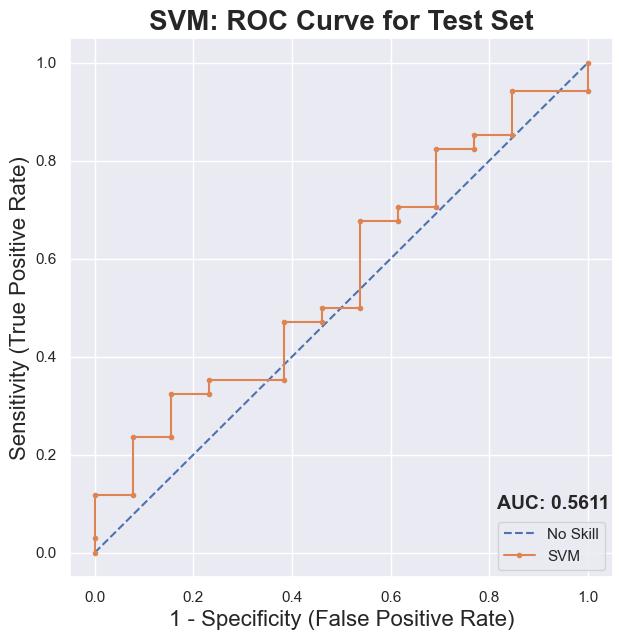

In [31]:
plot_roc_curve('SVM')

/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


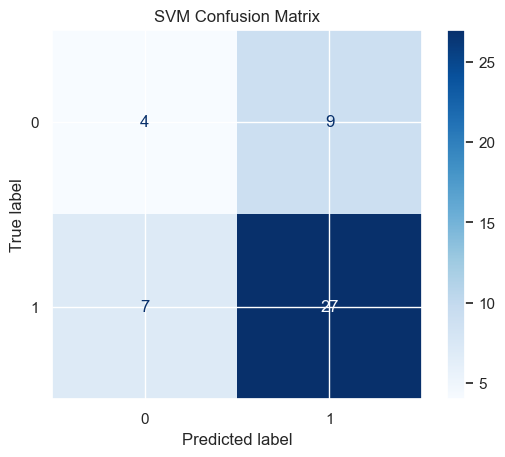

In [32]:
create_confusion_matrix('SVM', svm_model, X_test, y_test)

### Logistic Regression

#### Grid Search for Hyperparameters

In [33]:
lr_model = LogisticRegression()
lr_grid_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [10, 1, 0.1, 0.01, 0.001]
}

grid_search(lr_model, lr_grid_params, X_train, y_train)

{'C': 10, 'penalty': 'none'}


/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/s

#### Model Performance

In [34]:
lr_model = LogisticRegression(penalty = 'l2', C = 10)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print_metrics(y_test, y_pred)

Sens Score: 0.7647
Spec Score: 0.2308
PPV Score: 0.7222
NPV Score: 0.2727
Acc Score: 0.6170
F1 Score: 0.7429


In [36]:
lr_probs = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
auc = roc_auc_score(y_test, lr_probs)
print("AUC: " + str.format('{0:.4f}',auc))

AUC: 0.5792


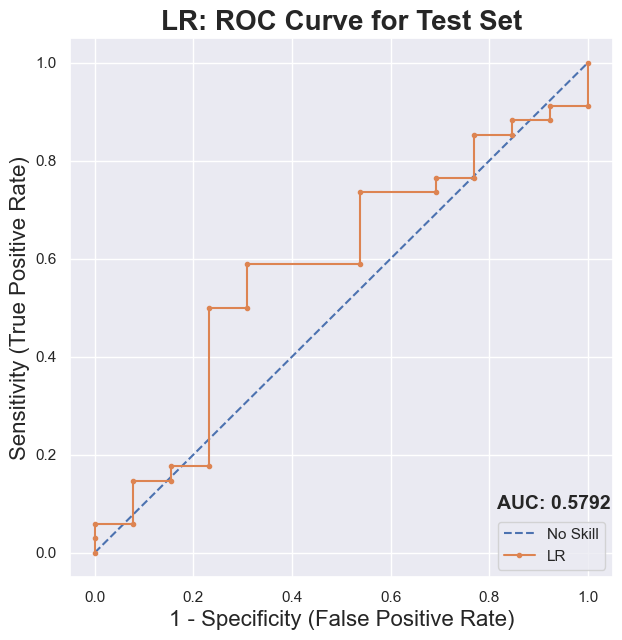

In [37]:
plot_roc_curve('LR')

/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


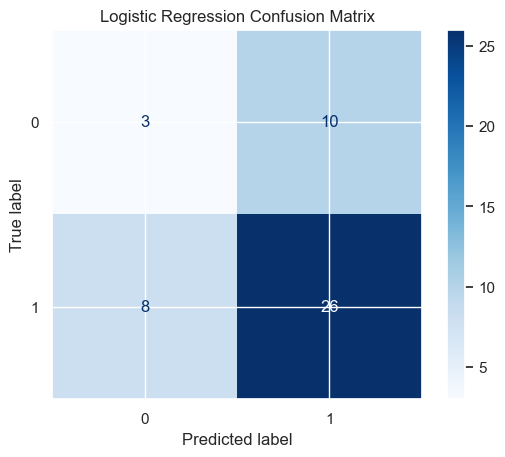

In [38]:
create_confusion_matrix('Logistic Regression', lr_model, X_test, y_test)

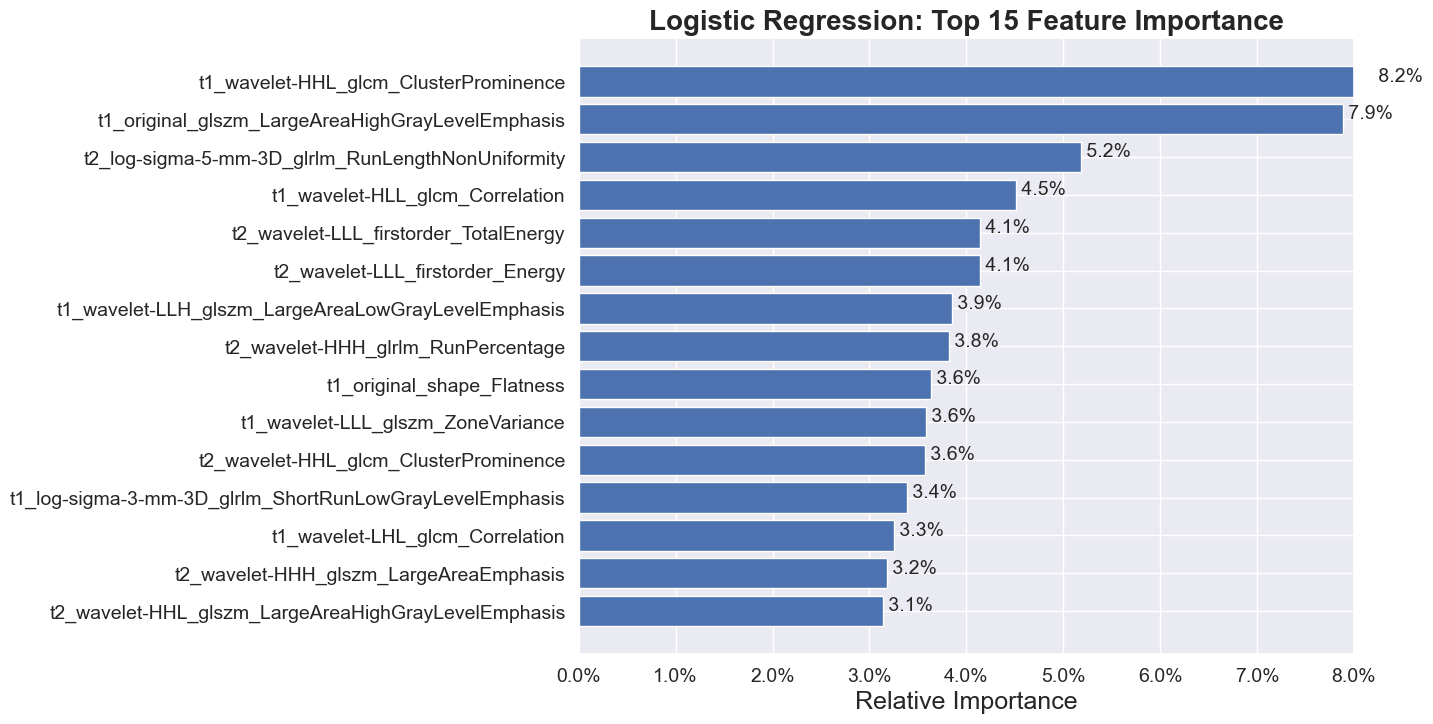

In [39]:
feature_names = X_test.columns.to_list()
importances = lr_model.coef_[0]
importances = np.abs(importances) / np.sum(np.abs(importances))

indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Logistic Regression: Top 15 Feature Importance',fontsize=20, fontweight='semibold')
plt.barh(range(len(indices[-15:])), importances[indices[-15:]], color='b', align='center')
plt.xlim(0, 0.08)
for index, value in enumerate(importances[indices[-15:]]):
    plt.text(value, index, " {:.1%}".format(value), fontsize=14)

plt.yticks(range(len(indices[-15:])), [feature_names[i] for i in indices[-15:]], fontsize=14)

plt.xlabel('Relative Importance',fontsize=18)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.xticks(fontsize=14)

plt.show()

Feature: 0, Score: -0.03145
Feature: 1, Score: 0.03185
Feature: 2, Score: 0.03252
Feature: 3, Score: -0.03383
Feature: 4, Score: -0.03574
Feature: 5, Score: 0.03587
Feature: 6, Score: 0.03637
Feature: 7, Score: 0.03818
Feature: 8, Score: 0.03853
Feature: 9, Score: -0.04140
Feature: 10, Score: -0.04140
Feature: 11, Score: 0.04510
Feature: 12, Score: 0.05182
Feature: 13, Score: -0.07883
Feature: 14, Score: 0.08201


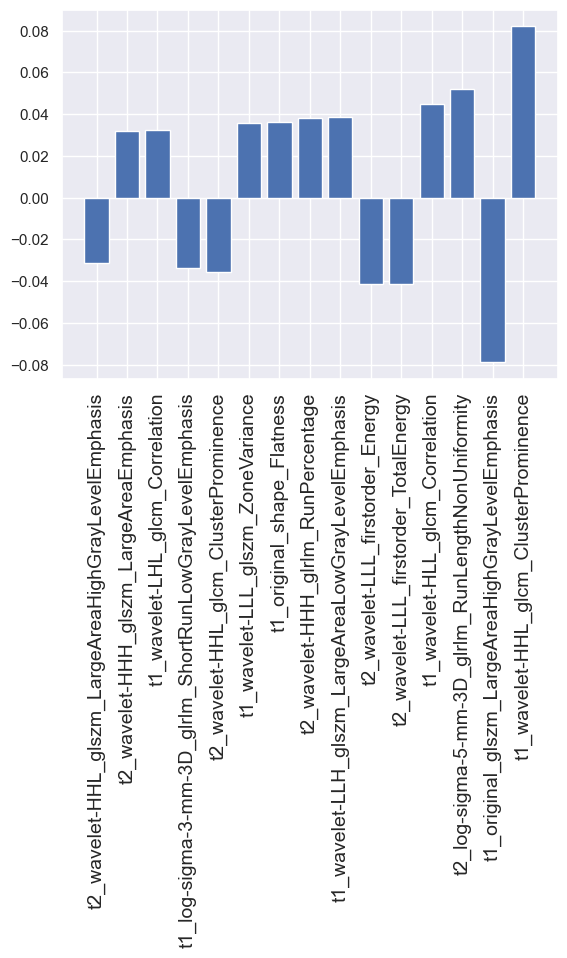

In [40]:
feature_names = X_test.columns.to_list()

importances_2 = lr_model.coef_[0]
importances_2 = (importances_2) / np.sum(np.abs(importances_2))

# summarize feature importance
for i,v in enumerate(importances_2[indices[-15:]]):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(indices[-15:]))], importances_2[indices[-15:]])
plt.xticks(range(len(indices[-15:])), [feature_names[i] for i in indices[-15:]], fontsize=14, rotation = 90)


plt.show()

### KNN

#### Grid Search for Hyperparameters

In [41]:
knn_model = KNeighborsClassifier()
knn_grid_params = {'n_neighbors': [3, 5, 7, 9]
}

grid_search(knn_model, knn_grid_params, X_train, y_train)

{'n_neighbors': 3}


#### Model Performance

In [42]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [43]:
print_metrics(y_test, y_pred)

Sens Score: 0.7353
Spec Score: 0.2308
PPV Score: 0.7143
NPV Score: 0.2500
Acc Score: 0.5957
F1 Score: 0.7246


In [44]:
knn_probs = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
auc = roc_auc_score(y_test, knn_probs)
print("AUC: " + str.format('{0:.4f}',auc))

AUC: 0.3971


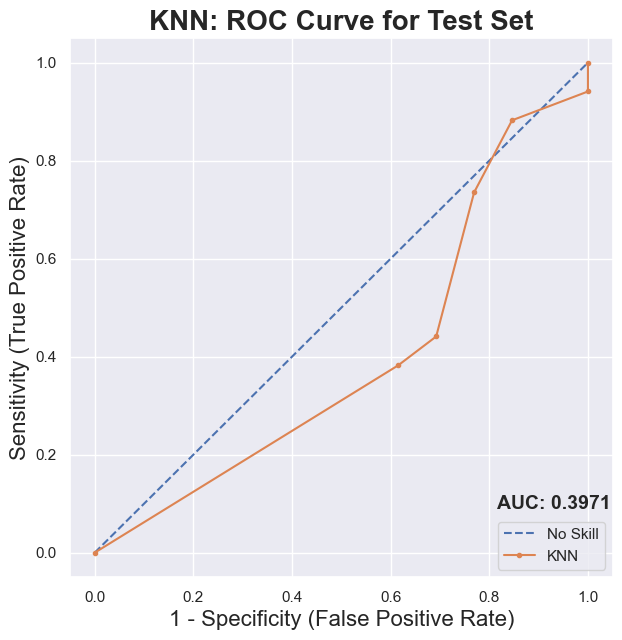

In [45]:
plot_roc_curve('KNN')

/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


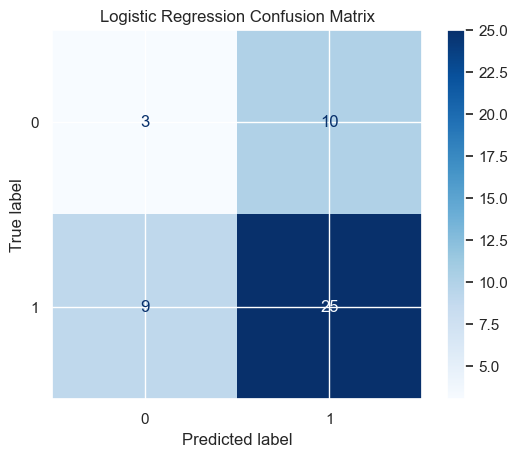

In [46]:
create_confusion_matrix('Logistic Regression', knn_model, X_test, y_test)

### Random Forest

#### Grid Search for Hyperparameters

In [47]:
rf_model = RandomForestClassifier(random_state = 42)
rf_grid_params = {'n_estimators': [None, 50, 100, 200, 300],
              'max_depth': [1, 2, 3, 4]
}

grid_search(rf_model, rf_grid_params, X_train, y_train)

{'max_depth': 4, 'n_estimators': 200}


/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 396, in fit
    self._validate_estimator()
  File "/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/ensemble/_base.py", line 136, in _validate_estimator
    raise ValueError(
Va

#### Model Performance

In [48]:
rf_model = RandomForestClassifier(max_depth = 4, n_estimators = 50, random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [49]:
print_metrics(y_test, y_pred)

Sens Score: 0.8824
Spec Score: 0.0769
PPV Score: 0.7143
NPV Score: 0.2000
Acc Score: 0.6596
F1 Score: 0.7895


In [50]:
rf_probs = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
auc = roc_auc_score(y_test, rf_probs)
print("AUC: " + str.format('{0:.4f}',auc))

AUC: 0.4548


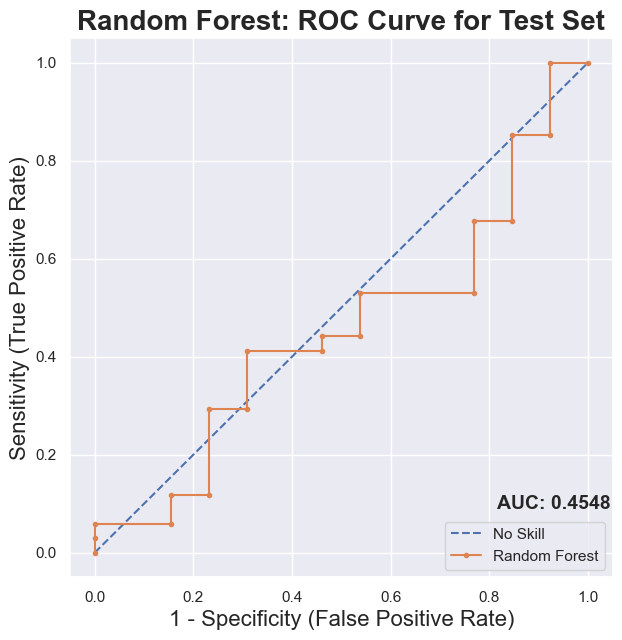

In [51]:
plot_roc_curve('Random Forest')

/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


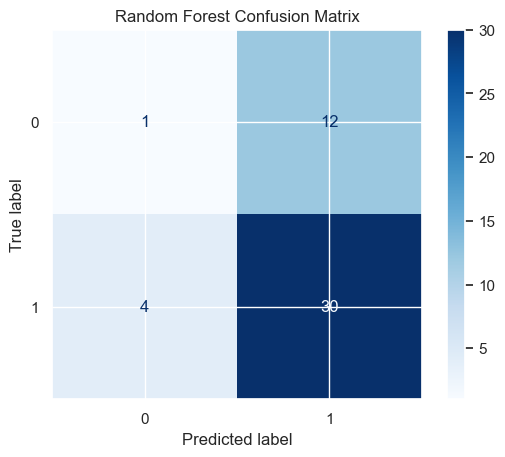

In [52]:
create_confusion_matrix('Random Forest', rf_model, X_test, y_test)

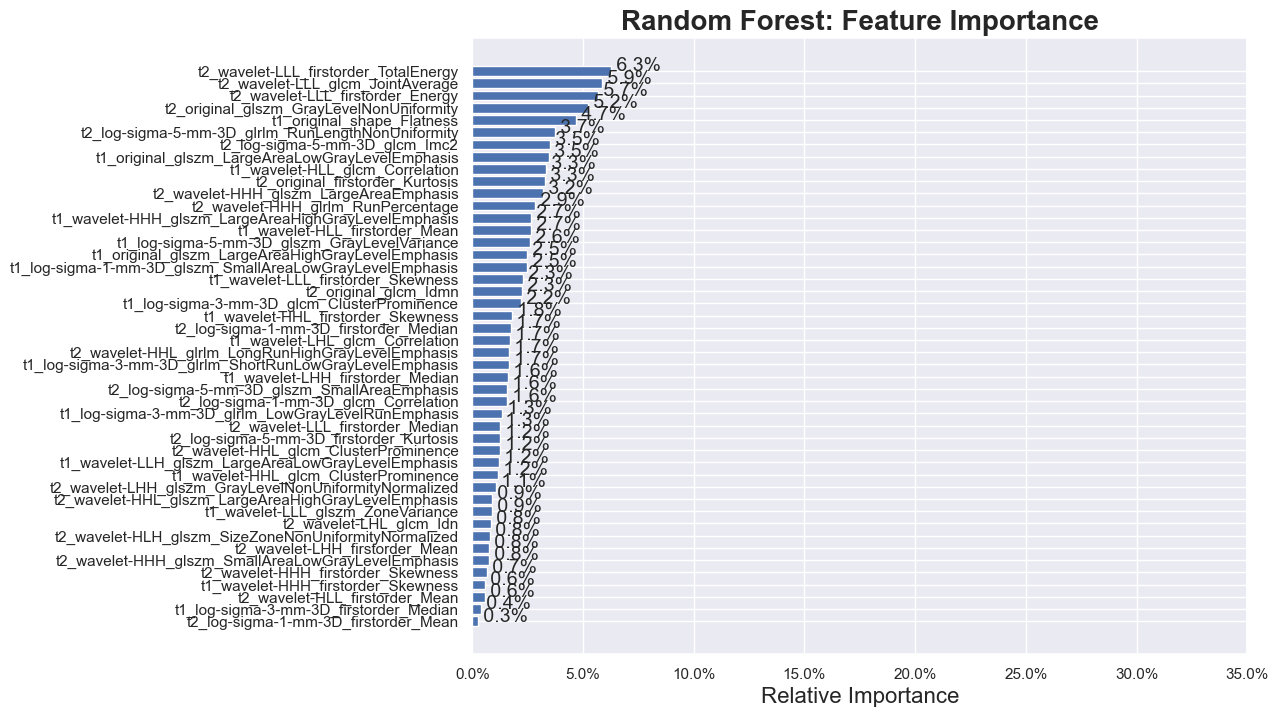

In [53]:
feature_names = X_test.columns.to_list()
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Random Forest: Feature Importance',fontsize=20, fontweight='semibold')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlim(0, 0.35)
for index, value in enumerate(importances[indices]):
    plt.text(value, index, " {:.1%}".format(value), fontsize=14)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance',fontsize=16)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

### XGBoost

#### Grid Search for Hyperparameters

In [47]:
xgb_model = XGBClassifier(random_state = 42)
xgb_grid_params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [3, 4, 5, 6]
}

grid_search(xgb_model, xgb_grid_params, X_train, y_train)

{'learning_rate': 0.3, 'max_depth': 5}


#### Model Performance

In [48]:
xgb_model = XGBClassifier(learning_rate = 0.3, max_depth = 5, random_state = 42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [49]:
print_metrics(y_test, y_pred)

Sens Score: 0.8810
Spec Score: 0.7917
PPV Score: 0.8810
NPV Score: 0.7917
Acc Score: 0.8485
F1 Score: 0.8810


In [50]:
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_probs)
auc = roc_auc_score(y_test, xgb_probs)
print("AUC: " + str.format('{0:.4f}',auc))

AUC: 0.8899


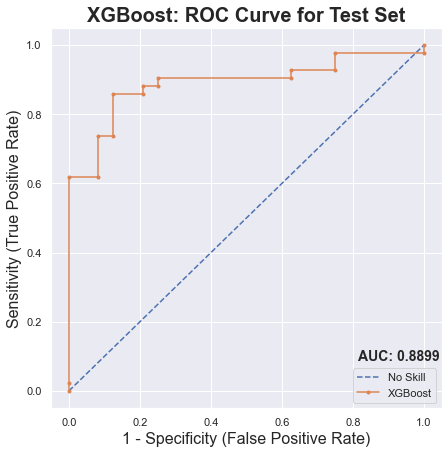

In [51]:
plot_roc_curve('XGBoost')

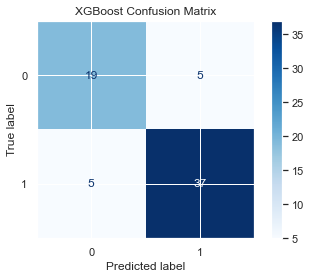

In [52]:
create_confusion_matrix('XGBoost', xgb_model, X_test, y_test)

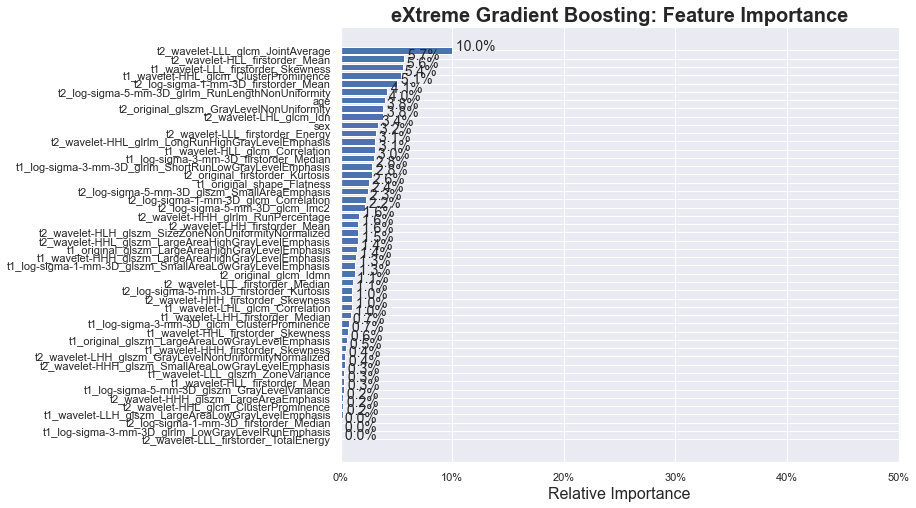

In [53]:
feature_names = X_test.columns.to_list()
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('eXtreme Gradient Boosting: Feature Importance',fontsize=20, fontweight='semibold')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlim(0, 0.5)
for index, value in enumerate(importances[indices]):
    plt.text(value, index, " {:.1%}".format(value), fontsize=14)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance',fontsize=16)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()

### Neural Net

#### Grid Search for Hyperparameters

In [65]:
nn_model = MLPClassifier(max_iter = 2000, random_state = 42)
nn_grid_params = {'hidden_layer_sizes': [(100, 100, 50), (50, 100, 50), (100, 50, 100)],
              'learning_rate': ['constant', 'invscaling', 'adaptive']
}

grid_search(nn_model, nn_grid_params, X_train, y_train)

{'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant'}


#### Model Performance

In [66]:
nn_model = MLPClassifier(hidden_layer_sizes = (100, 100, 50), learning_rate = 'constant', 
                         max_iter = 2000, random_state = 42)
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)

In [67]:
print_metrics(y_test, y_pred)

Sens Score: 0.8235
Spec Score: 0.2308
PPV Score: 0.7368
NPV Score: 0.3333
Acc Score: 0.6596
F1 Score: 0.7778


In [68]:
nn_probs = nn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, nn_probs)
auc = roc_auc_score(y_test, nn_probs)
print("AUC: " + str.format('{0:.4f}',auc))

AUC: 0.4774


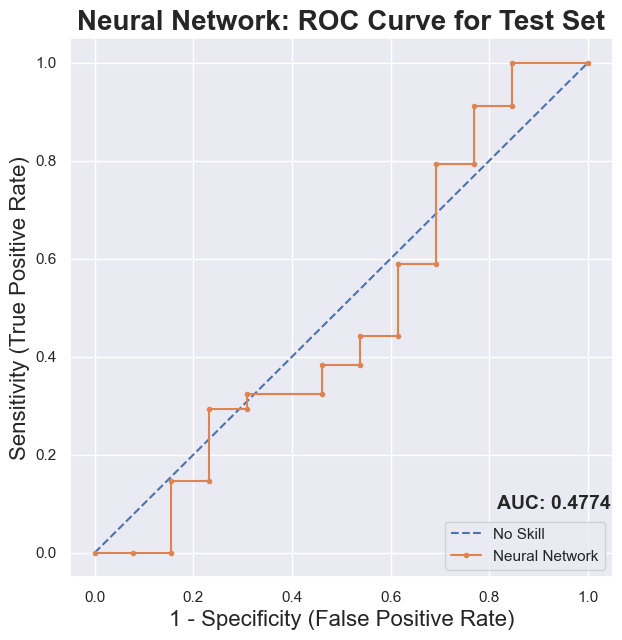

In [69]:
plot_roc_curve('Neural Network')

/mnt/c/miniconda3/envs/mb/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


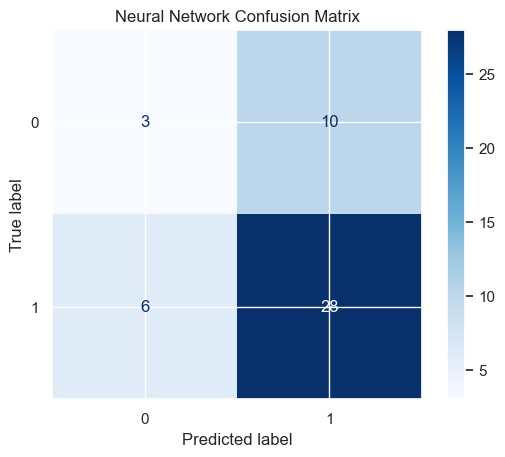

In [59]:
create_confusion_matrix('Neural Network', nn_model, X_test, y_test)